In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
# Approximation of the 99 % confidence interval of the mean.
# See: Theorem 2.2 in J.-I. Le Boudec: Performance Evaluation of Computer and Communication Systems. 
# EPFL Press, 2010 (available online: https://leboudec.github.io/perfeval/)
#
# Requirements: 
# (1) data is iid
# (2) data has finite variance 
# (3) number of samples is large 
def mean_99confint(data):
    m = np.mean(data)
    sem = stats.sem(data) # standard error of the mean (sem) = sigma / sqrt(n) 
    h = 2.58*sem
    return m-h, m+h

# Confidence interval of the mean.
# See: Theorem 2.3 in J.-I. Le Boudec: Performance Evaluation of Computer and Communication Systems. 
# EPFL Press, 2010 (available online: https://leboudec.github.io/perfeval/)
#
# Requirements:
# (1) iid data 
# (2) normally distributed data. See Q-Q-plot for a visual indication that our data is approximately 
#     normally distributed.
def mean_confint(data, confidence=0.95):
    n = len(data)
    m = np.mean(data)
    sem = stats.sem(data) # standard error of the mean (sem) = sigma / sqrt(n) 
    h = sem * stats.t.ppf((1.0+confidence)/2.0, n-1)
    return m-h, m+h

In [33]:
def stable_time(df_delay, threshold=0.00872665, window_duration=5.0):
    t = df_delay['t'].values
    angle = np.abs(df_delay['angle'].values)
    is_stable = angle < threshold
    n = len(t)
    start_idx = 0
    end_idx = 0

    while start_idx < n:
        while end_idx < n and t[end_idx] - t[start_idx] < window_duration:
            end_idx += 1
        
        if end_idx == n:
            break

        if is_stable[start_idx:end_idx].all():
            return t[start_idx]

        start_idx += 1

    return None

In [59]:
file_nodelay= '/home/mostovea/6g-projects/InvertedPendulum/src/build/results/5g-1/pid-all-dn/pid-all-dn-2.csv'
df_delay = pd.read_csv(file_nodelay, names= ['t', 'position', 'vx', 'angle', 'omega'], header=None, skiprows=1)
df_delay.head()

,t,position,vx,angle,omega
0,0.0000,5.0,0.000083,0.349000,0.001034
1,0.0001,5.0,0.000167,0.349000,0.002068
2,0.0002,5.0,0.000250,0.349000,0.003102
3,0.0003,5.0,0.000333,0.349001,0.004136
4,0.0004,5.0,0.000416,0.349001,0.005170


In [60]:
# Square errors
df_delay['angle'] = pd.to_numeric(df_delay['angle'], errors='coerce')
se_delay = df_delay['angle']**2

# Mean square errors
mse_delay = se_delay.sum()/len(se_delay)
print("Mean square error w/ delay = " + str(mse_delay))

Mean square error w/ delay = 0.0005234108130327171


In [61]:
mean_l,mean_h = mean_confint(df_delay['angle'], confidence=0.99)
print("w/ delay: mean_conf99 = [" + str(mean_l) + " s, " + str(mean_h) + " s]")

w/ delay: mean_conf99 = [-0.00015281272695159522 s, -6.556712444452401e-07 s]


In [64]:
stable_time(df_delay)

np.float64(10.4085)

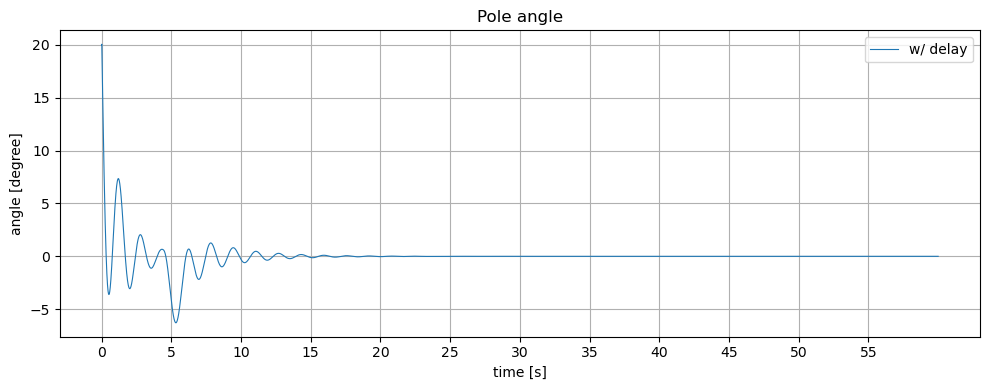

In [65]:
plt.figure(figsize=(10, 4))

plt.plot(df_delay['t'], np.degrees(df_delay['angle']), label="w/ delay", linewidth=0.8)
plt.ylabel('angle [degree]')
plt.xlabel('time [s]');
plt.title('Pole angle');
plt.legend(loc="upper right");
plt.xticks(np.arange(0, 60, 5))

plt.grid(True)

plt.tight_layout()

plt.savefig('angle_plot_events.png', dpi=300)

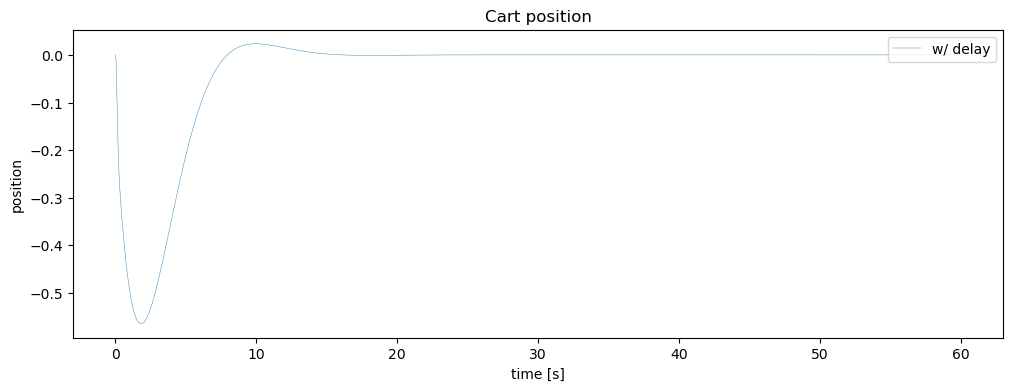

In [31]:
plt.figure(figsize=(12, 4))
plt.plot(df_delay['t'],df_delay['position'], label="w/ delay", linewidth=0.3)
#plt.scatter(df_delay['t']/1000000, df_delay['angle'],  marker='.', label="w/ delay")
plt.ylabel('position')
plt.xlabel('time [s]');
plt.title('Cart position');
plt.legend(loc="upper right");

#plt.savefig('position_plot.png', dpi=300)

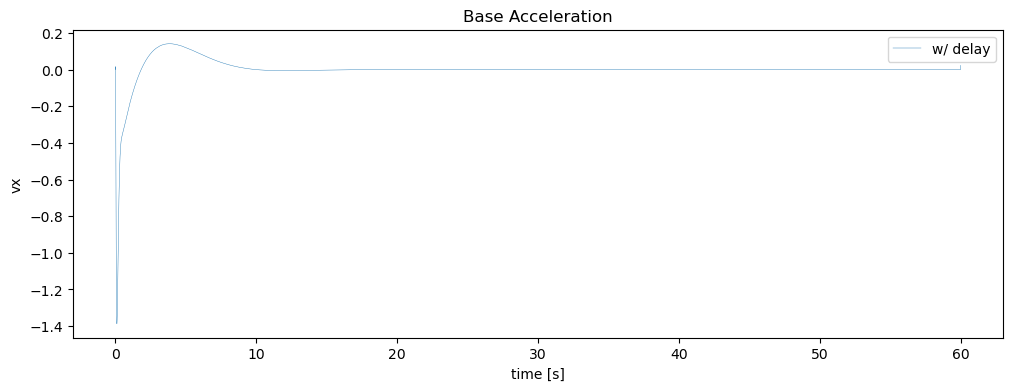

In [32]:
plt.figure(figsize=(12, 4))

plt.plot(df_delay['t'], df_delay['vx'], label="w/ delay", linewidth=0.3)
plt.ylabel('vx')
plt.xlabel('time [s]');
plt.title('Base Acceleration');
plt.legend(loc="upper right");